Evaluation Project - 1

Baseball Case Study

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors


-- Output: Number of predicted wins (W)

For downloading the dataset, use the link given below.

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [13]:
#Let's start with importing necessary Libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

1.Importing Data

In [18]:
#importing  data 
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


2.Check Data Type

In [19]:
#  check  data type of each column 
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [20]:
df.shape

(30, 17)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


3.Checking Null Values in DataFrame

In [22]:
# Checking Null Values in DataFrame
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

4.Check Duplicate

In [23]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


5.Check Descriptive statistics of data set

In [24]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


6.Performing EDA

In [27]:
def EDA(df,i): # create a function for Continuous variables
    plt.figure(figsize=(20,5),facecolor='#FFCBA4')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
   

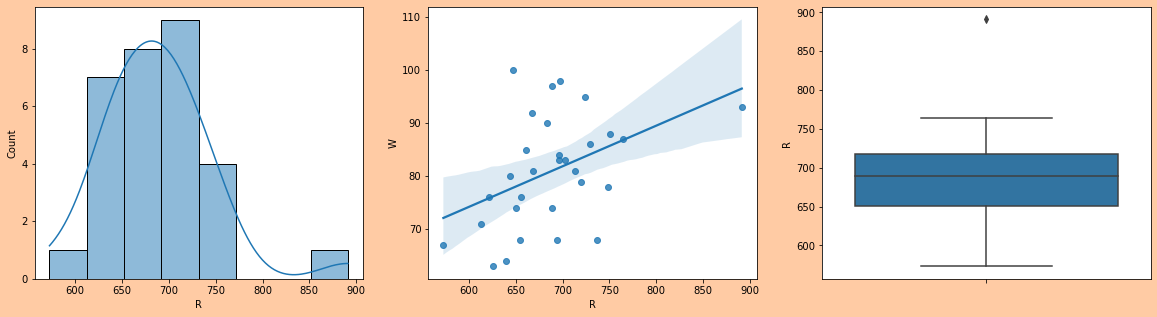

In [28]:
 EDA(df,'R')

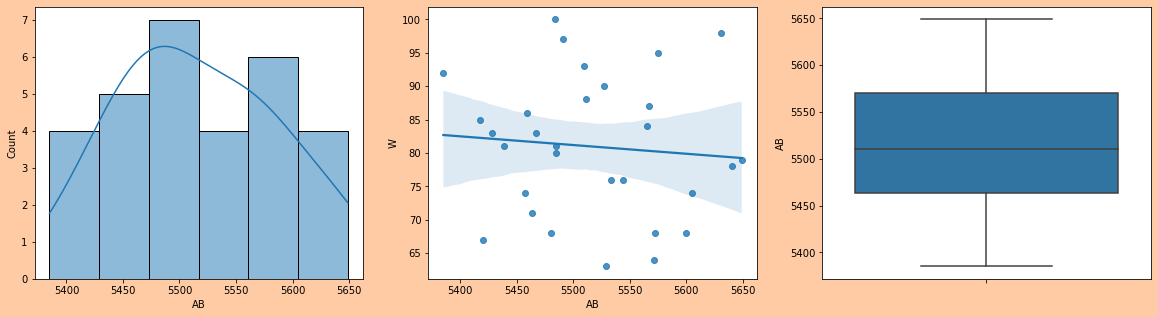

In [29]:
EDA(df,'AB')

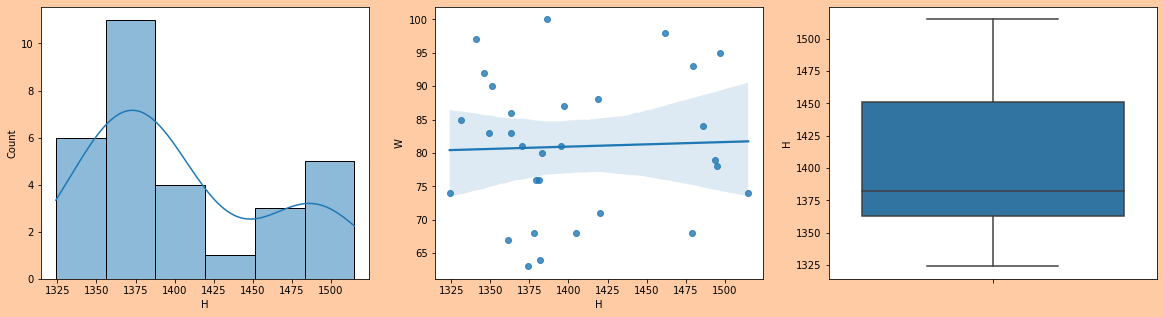

In [30]:
EDA(df,'H')

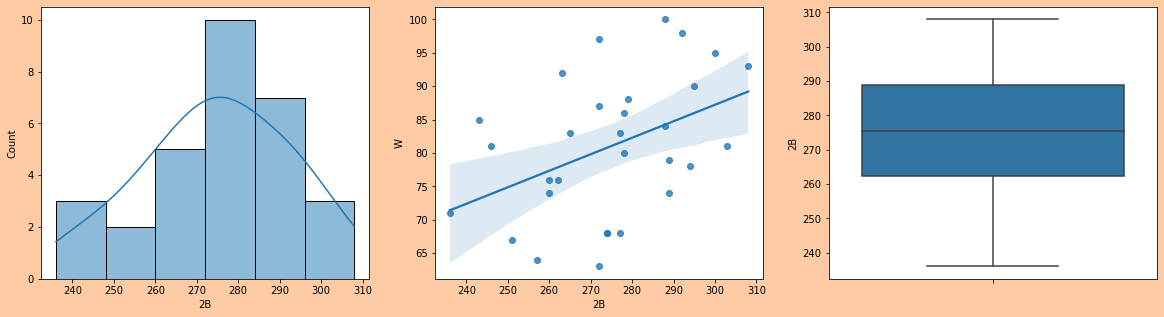

In [31]:
EDA(df,'2B')

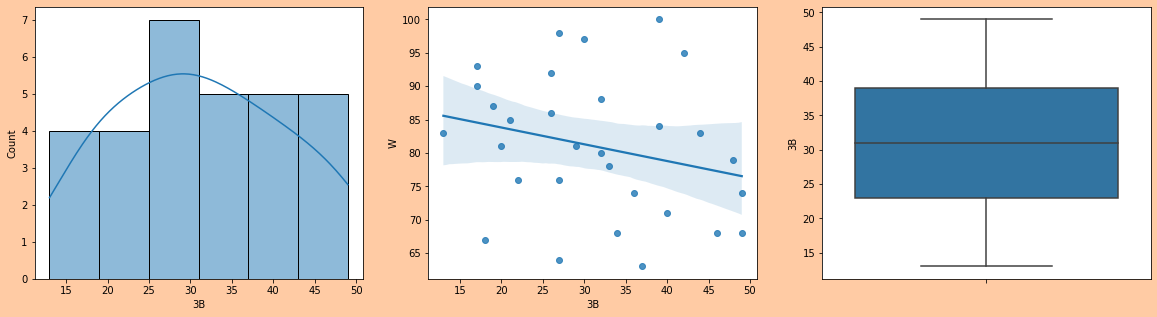

In [32]:
EDA(df,'3B')

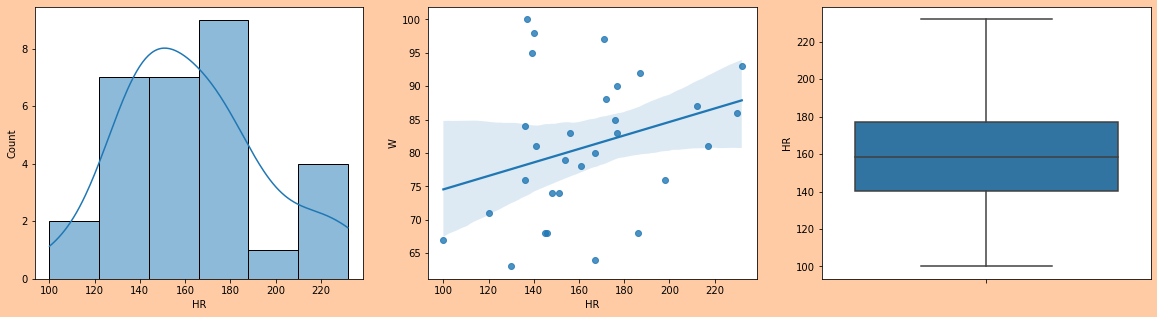

In [33]:
EDA(df,'HR')

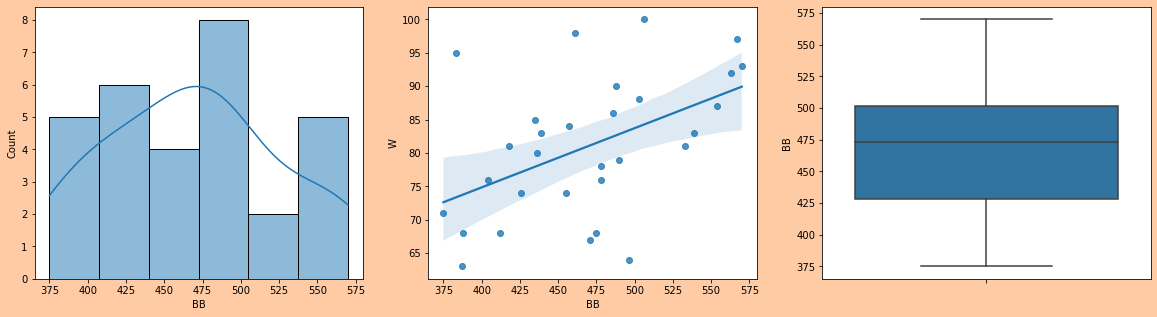

In [34]:
EDA(df,'BB')

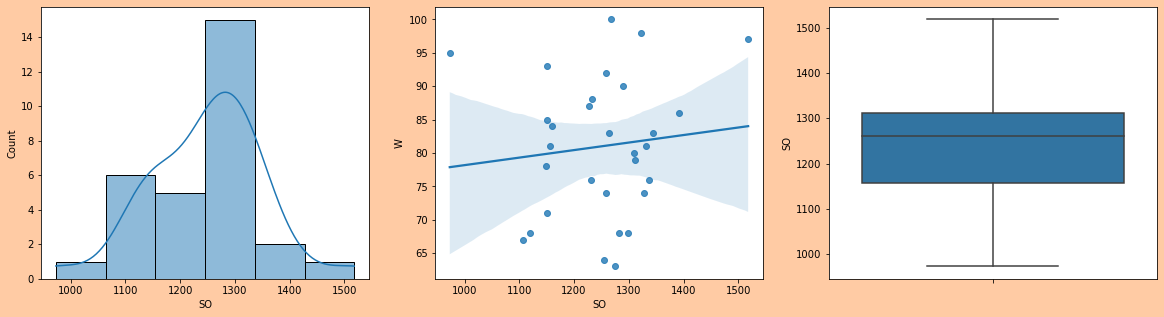

In [35]:
EDA(df,'SO')

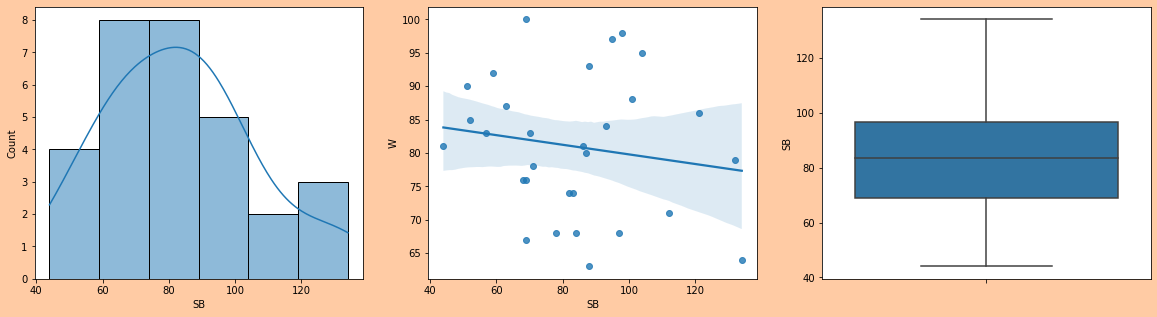

In [36]:
EDA(df,'SB')

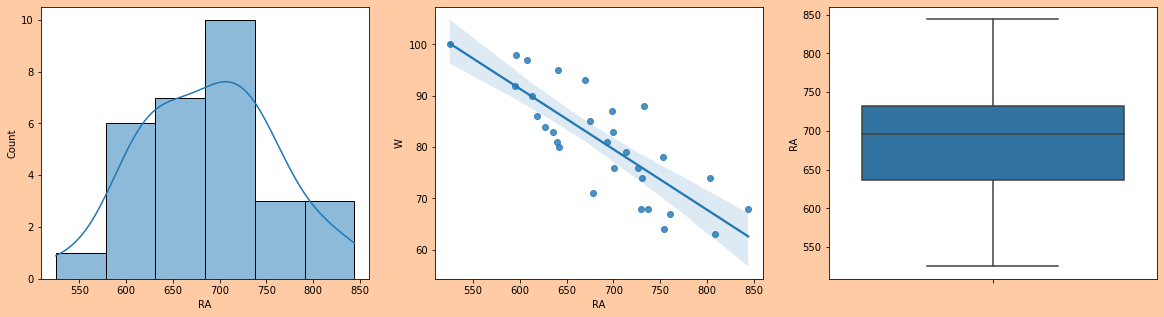

In [37]:
EDA(df,'RA')

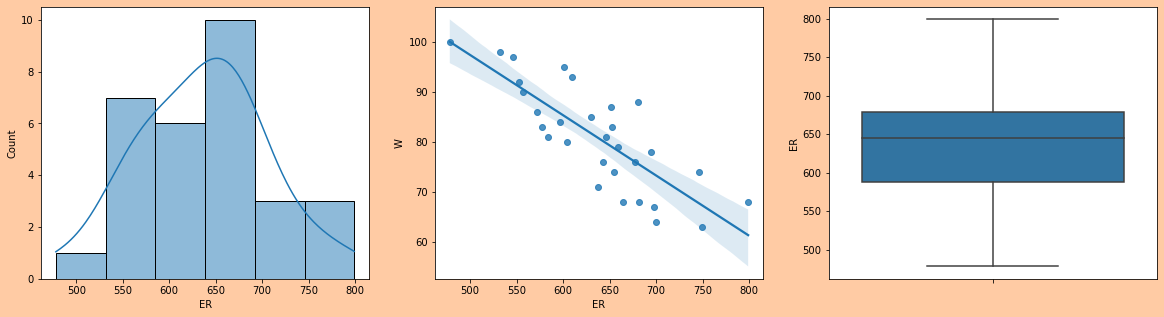

In [38]:
EDA(df,'ER')

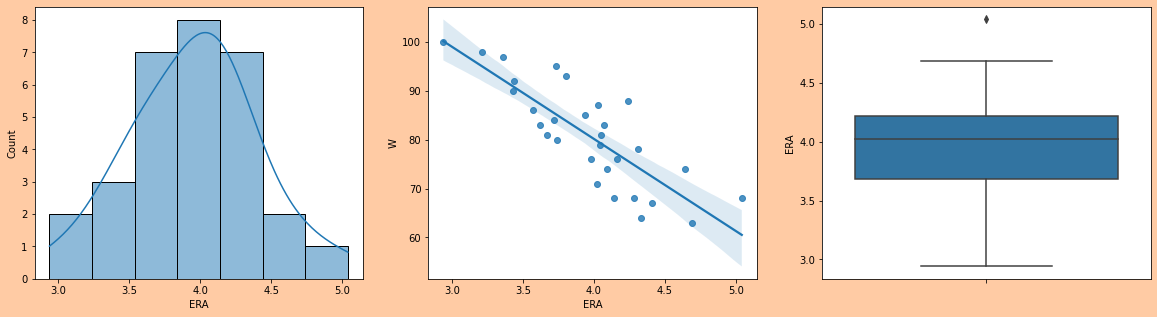

In [39]:
EDA(df,'ERA')

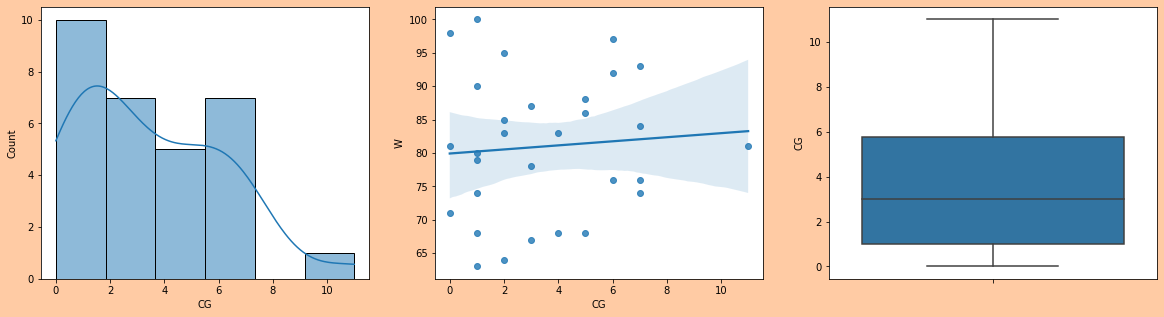

In [40]:
EDA(df,'CG')

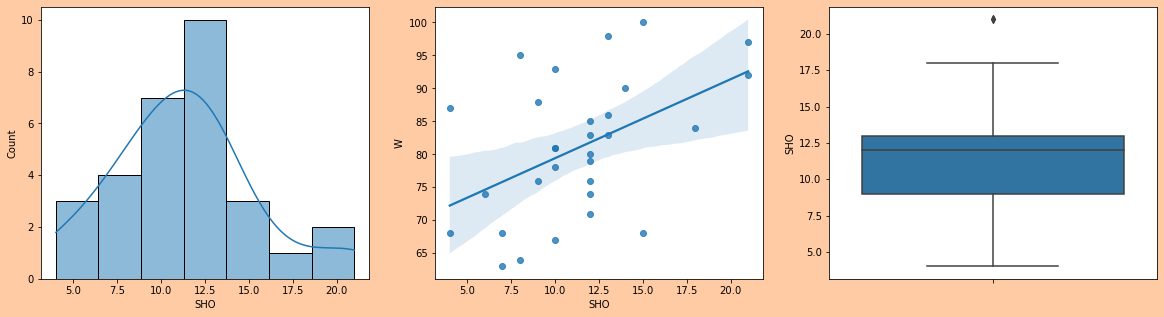

In [41]:
EDA(df,'SHO')

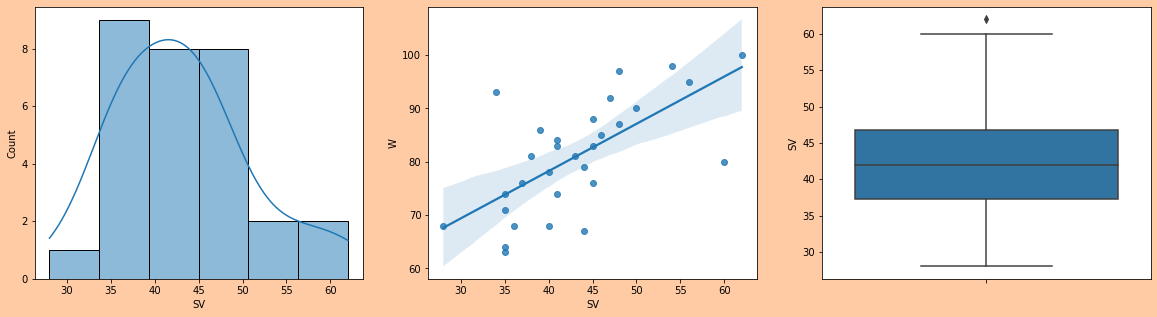

In [42]:
EDA(df,'SV') 

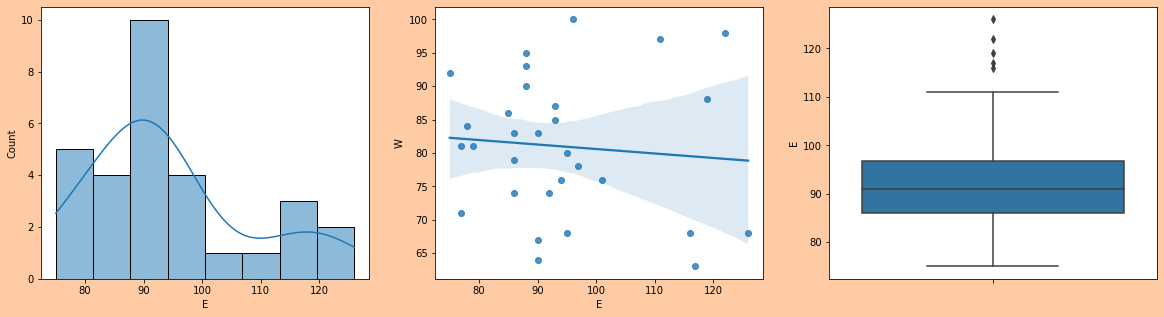

In [43]:
EDA(df,'E') 

Now that the numerical data has been analysed, it is time to tell some stories

The number of home runs,runs, doubles, shutouts,saves and walks are all strongly positively correlated.

Stolen bases, runs allowed, and earned runs are all highly negative linearly correlated.

The other features have less linear correlation with no of Wins

Outlier treatment

Outliers are extreme values in data that are far from the majority of the values. They can be seen as tails in the histogram.

Why should outliers be treated?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it deviates from the majority of the data.

There are below two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost.

Option-2: Impute the outlier values with a logical formula

How to remove Outliers..?

The outlires can be removed using the methods listed below.

1)Z-score method
2)IQR method

Standardization

It is a technique for transforming a data set into a normal distribution. There are numerous methods for removing the skewness.

1)Log-transformation
2)Square root transformation
3)Cube root transformation
4)Reciprocal transformation
5)Box-cox transformation
6)Power transformation
7)Square
8)Cube

7.Removing Outliers by Zscore method

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.03333333333333333


8.Seperating features and label

In [45]:
f = df1.drop('W', axis=1) #f for features
l = df1.W #l for label

9.Data Scaling standard Scaler

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scalar = StandardScaler()
scaled_feature = scalar.fit_transform (f) #only to the feature 

In [48]:
scaled_feature.shape

(29, 16)

In [49]:
f.shape

(29, 16)

10.Checking for the multicollinearity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = f.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


<AxesSubplot:>

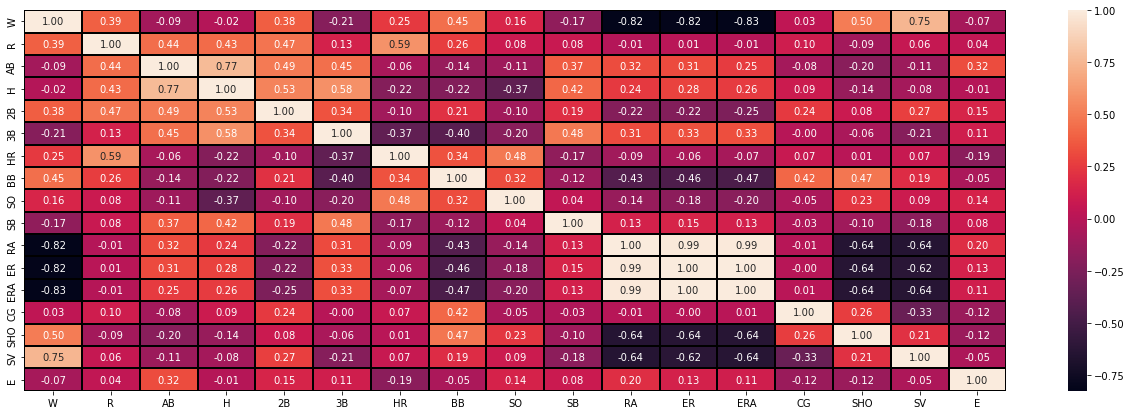

In [51]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

11.With the following function we can select highly correlated features

In [52]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

9

In [54]:
corr_features #highly correlated features name

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

Correlation of column with the target column

In [55]:
df1.corr()['W'].sort_values() # f.corrwith(l)

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

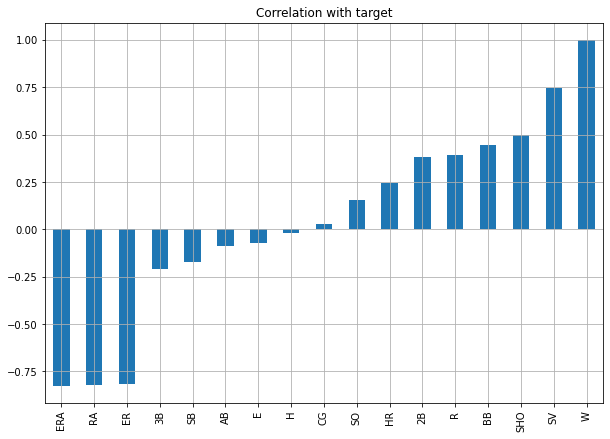

In [56]:
df1.corr()['W'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target') # graphical representation

Feature Selection Techniques

It is now time to select the best columns (Features) that are related to the Target variable.This can be accomplished directly by measuring correlation values or using ANOVA/Chi-Square tests.To get a better sense of the data, it is always helpful to visualise the relationship between the Target variable and each of the predictors.

The following techniques can be used to determine the relationship between two variables..

1) Visual exploration of relationship between variables
Continuous Vs Continuous ----> Scatter Plot
Categorical Vs Continuous----> Box Plot
Categorical Vs Categorical----> Grouped Bar Plots

2) Statistical evaluation of the strength of a relationship between variables
Continuous Vs Continuous ----> Correlation matrix

Categorical Vs Continuous----> ANOVA test--->SelectKBest

Categorical Vs Categorical---> Chi-Square test--->SelectPercentile
Target variable is Continuous, hence following scenarios will be present
Continuous Vs Continuous ----> Correlation matrix

Statistical Feature Selection (Continuous Vs Continuous) using Correlation matrix

Removing multi correlated features & Selecting only final features

In [57]:
f = df1.drop(columns=['W',  'AB', 'H',  '3B',   'SO', 'SB', 'RA', 'ER',
        'CG',  'E'], axis=1) #f for important only or best features
l = df1.W #l for label

In [58]:
scalar = StandardScaler()
scaled_feature = scalar.fit_transform (f) #scaling to the final feature 

In [59]:
# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = f.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,2.925754,R
1,2.155338,2B
2,2.475624,HR
3,1.684869,BB
4,3.257540,ERA
5,2.052548,SHO
6,1.954878,SV


12.Split data into train and test

In [60]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9648474191608399 on random state 30


In [61]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=30)

In [62]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [63]:
df.tail (2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


Predict the chance of win given features



In [64]:
# Since we have already fit the scaler, you can transform the data
print ('Chance of Win is',lrm.predict (scalar.transform ([[650,260,148,426,4.09,6,41 ]])))

Chance of Win is [73.44857898]


In [65]:
# Adjusted R2 score # .score is nothing but Adjusted R2 score
# when we have multiple feature that time we check Adjusted R2 score
print('Model accuracy score on training data------>',  lrm.score (x_train,y_train))
print('Model accuracy score on testing data------>',lrm.score(x_test,y_test))

Model accuracy score on training data------> 0.8820353239373457
Model accuracy score on testing data------> 0.9648474191608399


➤ Now our model performance is 94 % for training data set and 91 % for the test data set.

In [66]:
y_pred = lrm.predict(x_test)
y_pred

array([96.31928334, 73.44857898, 86.32076715, 85.44611395, 61.15502141,
       92.04634087, 80.91297443, 81.6268045 , 89.9487725 ])

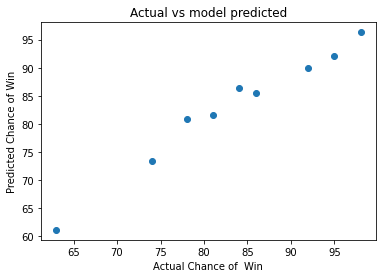

In [70]:
plt.scatter (y_test,y_pred)
plt.xlabel('Actual Chance of  Win')
plt.ylabel('Predicted Chance of Win')
plt.title('Actual vs model predicted')
plt.show()

Model evalution matrics for LinearRegression


1) Residuals
2) Mean absolute error
3) Mean Square error
4) Root Mean Square Error
5) R-squared /Adjusted R squared

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
y_pred = lrm.predict(x_test)

In [71]:
print ('mean_absolute_error is --->',mean_absolute_error(y_test,y_pred))
print ('mean_squared_error is --->',mean_squared_error(y_test,y_pred))
print ('mean_squared_error is --->',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_error is ---> 1.7218261132018544
mean_squared_error is ---> 3.7817233263264267
mean_squared_error is ---> 1.944665350729124


Let's see if our model is overfitting our training data.
Regularization

1) It is a techniques that are used to calibrate machine learning models
2) It is a technique to prevent the model from overfitting by adding extra information to it.
3) It is a technique that used to fix overfitting problem

Types of Regularization
1) Lasso( Least Absolute Shrinkage and Selection Operator) / L1 form
2) Ridge(L2form)

In [72]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

1) Lasso( Least Absolute Shrinkage and Selection Operator) / L1 form

In [73]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the L2-norm
lasscv = LassoCV (alphas = None, max_iter = 100, normalize = True) # normalize is similer to standerized the data
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

1.1) Best alpha parameter/best learning rate

In [74]:
# best alpha parameter/best learning rate
alpha= lasscv.alpha_
alpha

0.10539793245946863

1.2) now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before

In [75]:
lasso_reg = Lasso (alpha)
lasso_reg. fit (x_train, y_train)

Lasso(alpha=0.10539793245946863)

1.3) Let's Check Lasso regression score

In [76]:
lasso_reg.score(x_test,y_test)

0.9629282888396353

2) Using Ridge regression model

In [77]:
ridgecv=RidgeCV (alphas = np.arange (0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [78]:
ridgecv.alpha_

0.071

In [79]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.071)

In [80]:
ridge_model.score(x_test, y_test)


0.9645058001749305

Conlussion We got around same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.
1)lasso_reg.scor
2)ridge_model.score
3)regression.score

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

We can save the model and later we can use it for prediction

In [81]:
import pickle

In [82]:
# saving the model to the local file system
pickle.dump (lrm, open('lrm_model', 'wb'))

This is how we have succesfully build Linear Regression model